In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import random, os

import torch
from fastai.vision.all import *
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfecte

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_93.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_133.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C101P62ThinF_IMG_20150918_151942_cell_60.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C162P123ThinF_IMG_20151116_102655_cell_163.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C52P13thinF_IMG_20150725_124830_cell_174.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C136P97ThinF_IMG_20151005_141803_cell_121.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C48P9thinF_IMG_20150721_161243_cell_157.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C137P98ThinF_IMG_20151005_163901_cell_80.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Par

/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20

/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_93.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_133.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C101P62ThinF_IMG_20150918_151942_cell_60.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C162P123ThinF_IMG_20151116_102655_cell_163.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C52P13thinF_IMG_20150725_124830_cell_174.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C136P97ThinF_IMG_20151005_141803_cell_121.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C48P9thinF_IMG_20150721_161243_cell_157.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C137P98ThinF


![Thin blood Smear Malaria](https://www.shutterstock.com/shutterstock/photos/1515869834/display_1500/stock-photo-the-malaria-infected-red-blood-cells-d-illustration-showing-ring-form-trophozoites-of-malaria-1515869834.jpg)

**Overview**

Malaria is a life-threatening mosquito-borne disease caused by the Plasmodium parasite. There are several species of Plasmodium, with P. falciparum, P. vivax, P. malariae, P. ovale, and P. knowlesi being the most common ones affecting humans. The disease is transmitted to humans through the bites of infected female Anopheles mosquitoes.

Malaria remains a significant global health concern, particularly in tropical and subtropical regions. The World Health Organization (WHO) estimates that there were 241 million cases of malaria and 627,000 malaria-related deaths worldwide in 2020. The burden is especially high in sub-Saharan Africa, where the majority of cases and deaths occur, and children under five years of age are the most vulnerable.

Malaria remains a significant public health challenge in Africa, with a substantial impact on both human health and socioeconomic development. The continent accounts for a disproportionate share of the global malaria burden, and several factors contribute to the high prevalence of the disease in this region.

**Machine Learning for Malaria Classification:**

Utilizing machine learning for the classification of malaria in patients, particularly through the analysis of thin blood smears, offers several advantages:

Accuracy and Speed: Machine learning models can analyze large datasets of microscopic images with remarkable speed and accuracy. This is crucial for early and precise diagnosis, facilitating prompt initiation of treatment.

Objective Diagnosis: Automated classification eliminates the subjectivity associated with manual microscopy, reducing the likelihood of human error and enhancing the reliability of diagnostic results.

Scalability: Machine learning models can be deployed across diverse healthcare settings, including those with limited access to skilled laboratory personnel. This scalability is especially beneficial in resource-constrained regions.

Differentiation of Species and Life Cycle Stages: Machine learning algorithms can be trained to distinguish between different Plasmodium species and even identify different stages of the parasite's life cycle. This information can guide tailored treatment approaches.

Public Health Surveillance: Automated classification systems can contribute to efficient monitoring and surveillance of malaria prevalence, aiding in the development of targeted interventions and public health strategies.

In [2]:
# directory of the data set
path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/'

In [3]:
# transforms raw data into form acceptable for training. assign labels to files and split data into train and validation set. Also resizes the image data
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=[*aug_transforms()])

# Create DataLoader with augmentations
dls = data.dataloaders(path)


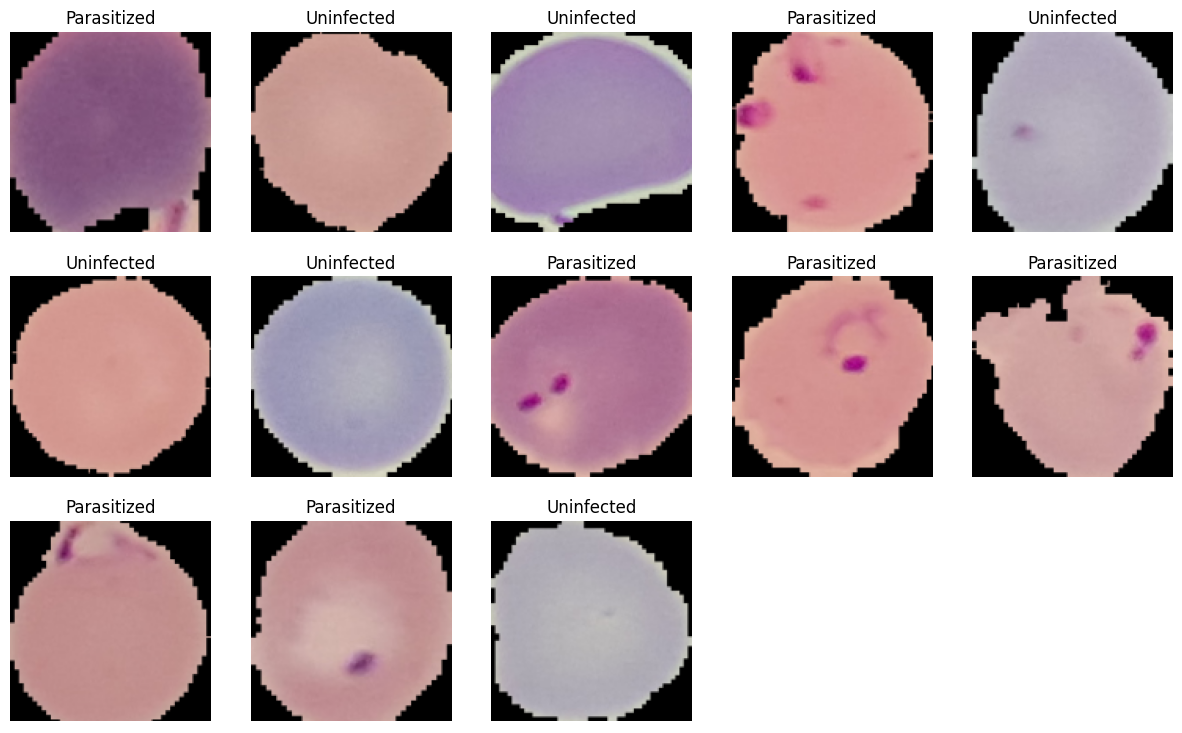

In [4]:
dls.valid.show_batch(max_n=13, nrows=3)

We would like to select our base line pretrained model and for that reason we will be training and fine-tuning and a number of pretrained model

In [5]:
pretrained_models = [resnet34,resnet18, resnet50, vgg16_bn, densenet121]

for model in pretrained_models:
    # Create the learner
    learn = cnn_learner(dls, model, metrics=accuracy)
    
    # Fine-tune the model
    learn.fine_tune(epochs=1)
    
    # Evaluate the model
    print(f"Model: {model.__name__}, Accuracy: {learn.validate()[1]}")

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

  2%|▏         | 1.97M/83.3M [00:00<00:04, 20.6MB/s]

 13%|█▎        | 10.7M/83.3M [00:00<00:01, 62.1MB/s]

 20%|██        | 16.8M/83.3M [00:00<00:01, 63.0MB/s]

 28%|██▊       | 23.1M/83.3M [00:00<00:00, 64.1MB/s]

 36%|███▌      | 29.8M/83.3M [00:00<00:00, 66.3MB/s]

 43%|████▎     | 36.2M/83.3M [00:00<00:00, 65.6MB/s]

 51%|█████▏    | 42.7M/83.3M [00:00<00:00, 66.7MB/s]

 59%|█████▉    | 49.3M/83.3M [00:00<00:00, 67.4MB/s]

 67%|██████▋   | 56.0M/83.3M [00:00<00:00, 68.0MB/s]

 75%|███████▍  | 62.4M/83.3M [00:01<00:00, 66.1MB/s]

 83%|████████▎ | 68.8M/83.3M [00:01<00:00, 65.5MB/s]

 91%|█████████ | 75.6M/83.3M [00:01<00:00, 67.3MB/s]

 98%|█████████▊| 82.0M/83.3M [00:01<00:00, 66.8MB/s]

100%|██████████| 83.3M/83.3M [00:01<00:00, 65.2MB/s]

from the results above we see that vgg16_bn provides the best accuracy and so we will be using it as our pretrained model to establish our baseline 

In [ ]:
learn = cnn_learner(dls, vgg16_bn, metrics=[error_rate,accuracy])
learn.fine_tune(6)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Our model peformed quite well with an accuracy score of 0.971874. Since we are considering a healthcare dataset, it is more costly to have false positives than false negative and as such we will be leveraging other means of improving our model

In [ ]:
interp.plot_top_losses(4, nrows=4)

In [ ]:
learn.save('model_1_vgg')

Our model performed quite well but we will also try to improve it using other means. For that we will be adjusting our learning rate to see if that improves the model.
First we want to plot the loss against the learning rate to find the learning rate that is equivalent to when the loss starts to decrease consistent

In [ ]:
learn = cnn_learner(dls, vgg16_bn, metrics=error_rate)
lr_min = learn.lr_find()

In [ ]:
print(lr_min)

The learning rate where there is a consistent or stable loss is 0.0030199 however will be try to test two other learning rates before and after it to see how it performs. we will be making use of 1e-3 and 6e-3

In [ ]:
learning = [1e-3, 6e-3, 3e-3]
for i in learning:
    learn = cnn_learner(dls, vgg16_bn, metrics=[accuracy])
    learn.fine_tune(1, base_lr=i)
    print(f"lr: {i}, accuracy: {learn.validate()[1]}")


From the code above we see that the learning rate of 3e-3 performed better and so we will be using it to train our model to see how this further performs.

In [ ]:
learn_one = cnn_learner(dls, vgg16_bn, metrics=[error_rate,accuracy])
learn_one.fine_tune(6, base_lr=3e-3)

In [ ]:
print(learn_one.validate()[2])


In [ ]:
learn.save('model_2_vgg')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_one)
interp.plot_confusion_matrix()

The model above performs greatly as well but not not as good as the base line in terms of accuracy. However we see that the false positive decreased. we want to see if we can achieve better results

In transfer learning, we commonly freeze the pretrained layers and train only the new layers. This is because the pretrained layers are early layers that already capture generic information as they are trained on thousands of datasets. The higher layers capture dataset specific features and so it is normally trained. However since we are looking forward to improving our model we want to consider unfreezing the pretrained layer to see how that works.

In [ ]:
learn_one.unfreeze()

In [ ]:
learn_one.lr_find()

In [ ]:
learn_one.fit_one_cycle(6, lr_max=1e-5)
#lr_max is used when we want learning rate to vary throughout training

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_one)
interp.plot_confusion_matrix()

In [ ]:
preds, labels = learn_one.get_preds()


In [ ]:
from sklearn.metrics import classification_report

pred_labels = torch.argmax(preds, dim=1)
true_labels = labels.numpy()

print(classification_report(true_labels, pred_labels))


In [ ]:
learn.save('model_3_vgg')

We see that the accuracy of the model increased for when we unfreeze and free our model with an accuracy score of 0.9247. The false positives seem to decrease but we also see an increase in the false negative. For the finally trial for improvement we want to consider discriminate learning rate where the a lower learning rate is used in the lower layers and a higherlearning rate is used at the higher layers. based on the learning rates in the plot above we will choose the best learning rates. for lower layers we would consider a learning rate that is a little lower than the steepest loss learning rate(if that makes sense) and the for the higher layers we will be doing the opposite

In [ ]:
learn_one.fit_one_cycle(6, lr_max=slice(3e-5,7e-5))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_one)
interp.plot_confusion_matrix()

Conclusion
the classification of malaria using thin blood smears proves to be a valuable and effective approach for accurate diagnosis. In our project we considered several steps to attain a high performance of our model. 
- First we considered our baseline, vgg_bn proved to be the best pretrained model for our baseline and as such we carried out the training process with this model. Our model performed well with an accuracy of 0.97187. In a bid to improve our model we tried setting a base learning rate.
- Setting a base learning rate also prooved effective. Plotting our loss against several learning rate allowed us to find the optimal learning rate which is the learning rate with the steepest loss.Our model performed well but not as good as the baseline. Next we considered unfreezing our model. 
- Unfeezing our model prooved to be tremendously effective as it plunged the accuracy to 0.97282. Next we tried to consider discriminative learning rate where different learning rates are trained in different parts of the model.
- Discriminative learning rates: This performed with a little less accuracy than when we considered unfreezing our model.
Overall our best accuracy happens to be 0.9782

